# Factor Analysis on Airlines Dataset

- Factor Analyzer Installation : It is used for efficient factor analysis in Python, revealing latent patterns and reducing dimensionality in datasets.

In [2]:
!pip install factor_analyzer

  Using cached factor_analyzer-0.5.1-py2.py3-none-any.whl


- Scikit-lean Installation : It is a versatile machine learning library in Python, offering tools for data preprocessing, model building and evaluation.

In [3]:
!pip install scikit-learn

- Required Package Installation.

In [4]:
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns

- Reading Excel File with Pandas

In [5]:
df=pd.read_excel('airline (1).xlsx')

- DataFrame Columns

# EDA

In [6]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Age', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

- Displaying the Top Rows of the DataFrame.

In [7]:
df.head()

,id,Gender,Customer Type,Type of Travel,Class,Flight Distance,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,Business travel,Eco,160,52,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,Business travel,Business,2863,36,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,Business travel,Eco,192,20,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,Business travel,Business,3377,44,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,Business travel,Eco,1182,49,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


- DataFrame Shape.

In [8]:
df.shape

(25976, 24)

- Converting Satisfaction Levels to Binary Values.

In [9]:
df['satisfaction']=df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1}) 

- Creating a Subset DataFrame (df_dropped) from Column Index 6 to -3

In [10]:
df_dropped = df.iloc[:, 7:-3]

- Subset DataFrame.

In [11]:
df_dropped

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,3,3,3,1,4,3,4,4,3,2,4,4,5,4
25972,4,4,4,4,4,4,4,4,4,5,5,5,5,4
25973,2,5,1,5,2,1,2,2,4,3,4,5,4,2
25974,3,3,3,3,4,4,4,4,3,2,5,4,5,4


- Correaltion Matrix (z) for Subset DataFrame.

In [12]:
z=df_dropped.corr()

- Correlation Heatmap.

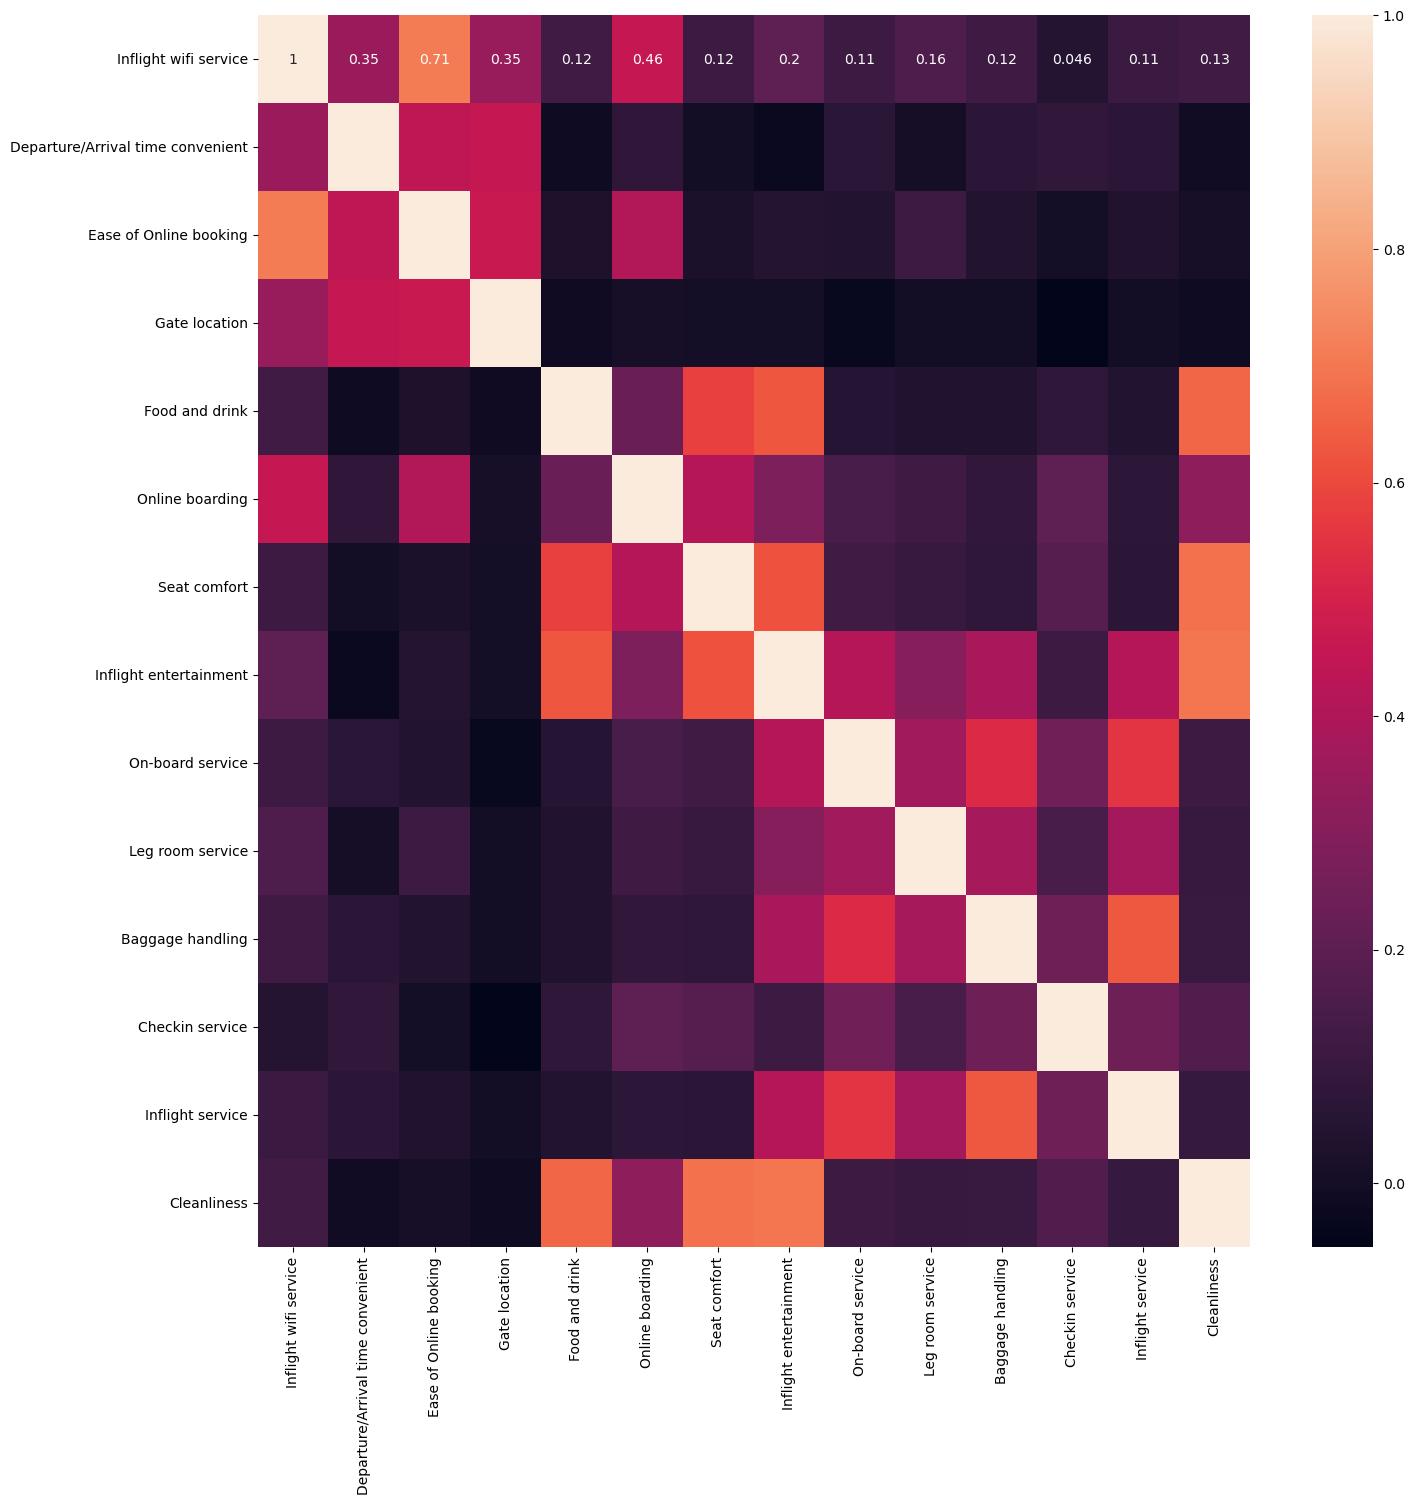

In [13]:
plt.figure(figsize=(16,16))
sns.heatmap(z, annot=True)
plt.show()

# Adequacy Test : Bartlett’s Test of Sphericity.
- HYPOTHESIS :
- Null Hypothesis (H0): The observed variables in the dataset are not correlated, and therefore, the correlation matrix is an identity matrix (spherical).
- Alternative Hypothesis (H1): The observed variables in the dataset are correlated, and the correlation matrix is not an identity matrix (non-spherical).

In [14]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(df_dropped)
print("Chi Square Value, P Values=",chi_square_value,p_value)

Chi Square Value, P Values= 152158.4023161434 0.0


# Kaiser-Meyer-Olkin (KMO) Test
- HYPOTHESIS:
- Null Hypothesis (H0): The observed variables in the dataset are not suitable for structure detection, indicating that the partial correlations are close to zero.
- Alternative Hypothesis (H1): The observed variables in the dataset are suitable for structure detection, indicating that the partial correlations are significantly different from zero.

In [15]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_dropped)
print("KMO Value=",kmo_model)

KMO Value= 0.782427458383862


- Standardization of Data

In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_dropped)

# Factor Extraction

- Principal Component Analysis (PCA)

In [17]:
pca = PCA()
pca.fit(data_scaled)

PCA()

- Eigen Score and Variance Analysis

In [18]:
eigen_values = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_ratio = variance_ratio.cumsum()

- Eigen values, Variance ratio, Cumulative ratio

In [19]:
eigen_values
variance_ratio
cumulative_ratio

array([ 27.04455858,  44.24888179,  59.8318573 ,  67.427921  ,
        74.1704245 ,  79.09184021,  82.86843477,  86.49486582,
        89.79976912,  92.40701571,  94.76802354,  96.82096622,
        98.67469909, 100.        ])

# Principal component Analysis Results

In [20]:
pca_results = pd.DataFrame({
    'eigenvalue': eigen_values,
    'percentage of variance': variance_ratio,
    'cumulative percentage of variance': cumulative_ratio
})
pca_results.index = ['comp ' + str(i+1) for i in pca_results.index]

In [21]:
pca_results

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.786384,27.044559,27.044559
comp 2,2.408698,17.204323,44.248882
comp 3,2.181701,15.582976,59.831857
comp 4,1.063490,7.596064,67.427921
comp 5,0.943987,6.742504,74.170425
comp 6,0.689025,4.921416,79.091840
comp 7,0.528744,3.776595,82.868435
comp 8,0.507720,3.626431,86.494866
comp 9,0.462704,3.304903,89.799769
comp 10,0.365029,2.607247,92.407016


# Scree Plot

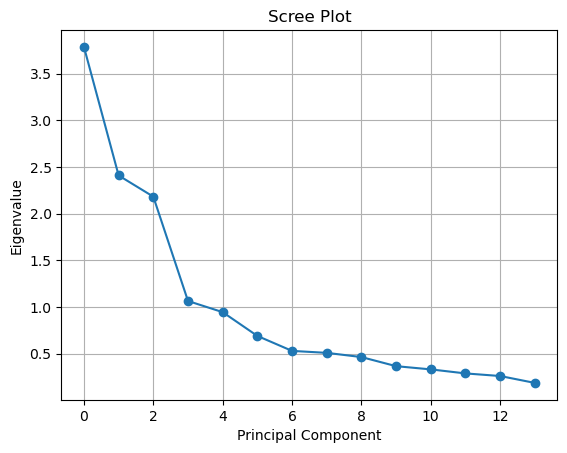

In [22]:
plt.plot(eigen_values, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

- Eigenvalues Calculation using FactorAnalyzer

In [23]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None)
fa.fit(df_dropped)
ev,v =fa.get_eigenvalues()
ev

array([3.7862382 , 2.40860525, 2.18161657, 1.06344892, 0.94395049,
       0.6889982 , 0.52872324, 0.50770035, 0.46268646, 0.36501452,
       0.3305411 , 0.28741198, 0.2595226 , 0.18554213])

# Factor Analysis Execution
- Decided to extract 6 factors based on eigen values.
- Equamax

In [24]:
fa = FactorAnalyzer(n_factors=6,rotation='equamax', method='principal')
fa.fit(df_dropped)

FactorAnalyzer(method='principal', n_factors=6, rotation='equamax',
               rotation_kwargs={})

- Importing the 'inspect' Module

In [25]:
import inspect

- Communalities Calculation

In [26]:
communalities = fa.get_communalities()
print(communalities)

[0.78559812 0.71533351 0.82254197 0.74090011 0.73355346 0.81939318
 0.74433488 0.86203237 0.65995584 0.97987007 0.71825971 0.93314132
 0.75605907 0.80188402]


- Specific Variance Calculation

In [27]:
specific_variance = 1 - communalities
print(specific_variance)

[0.21440188 0.28466649 0.17745803 0.25909989 0.26644654 0.18060682
 0.25566512 0.13796763 0.34004416 0.02012993 0.28174029 0.06685868
 0.24394093 0.19811598]


- Full Arguments Specification for FactorAnalyzer Inspection

In [28]:
inspect.getfullargspec(FactorAnalyzer)

FullArgSpec(args=['self', 'n_factors', 'rotation', 'method', 'use_smc', 'is_corr_matrix', 'bounds', 'impute', 'svd_method', 'rotation_kwargs'], varargs=None, varkw=None, defaults=(3, 'promax', 'minres', True, False, (0.005, 1), 'median', 'randomized', None), kwonlyargs=[], kwonlydefaults=None, annotations={})

# Factor Loadings

In [29]:
fa.loadings_

floading=pd.DataFrame(fa.loadings_)
floading

,0,1,2,3,4,5
0,0.088109,0.815318,0.097038,0.299542,-0.079159,0.087654
1,-0.036526,0.208318,0.080663,0.789093,0.169960,-0.111992
2,-0.040496,0.780925,0.002492,0.445123,-0.073964,0.086301
3,0.005656,0.159960,-0.047678,0.836202,-0.102481,0.057205
4,0.853068,0.014387,-0.033958,0.032426,-0.047748,-0.033709
5,0.309291,0.788892,0.026572,-0.216017,0.230317,-0.031075
6,0.834265,0.129535,-0.023354,-0.046406,0.169274,0.014342
7,0.807636,0.072752,0.421083,-0.008645,-0.088974,0.138425
8,0.106825,0.084125,0.781695,-0.041479,0.122135,0.117401
9,0.081390,0.087891,0.290348,-0.013258,0.063783,0.936469


# Factor Rotation Matrix

In [30]:
fa.rotation_matrix_
froma=pd.DataFrame(fa.rotation_matrix_)
froma

,0,1,2,3,4,5
0,0.729706,0.367255,0.499640,-0.099244,-0.173267,0.207706
1,-0.352822,0.650285,-0.080382,-0.665707,0.054022,0.010065
2,-0.545458,-0.163216,0.757091,0.032190,-0.128871,0.291558
3,-0.209704,0.550476,-0.158198,0.629801,-0.478809,0.045458
4,-0.021875,0.280776,0.034136,0.353543,0.819440,0.350780
5,0.032665,-0.183725,-0.380158,-0.155908,-0.222964,0.864082


# Factor Scores

In [31]:
fscore = fa.transform(df_dropped)
fscore_data=pd.DataFrame(fscore)
fscore_data

,0,1,2,3,4,5
0,0.453928,0.775686,1.433984,0.557411,-1.366953,0.813525
1,1.226241,-0.123381,0.130128,-1.571832,-0.231942,0.313283
2,-0.998353,-0.444453,-0.262374,-0.572078,-1.225155,-1.260164
3,0.176662,-0.850084,-2.612650,-1.812640,0.590893,-1.106874
4,-0.126590,-0.759299,-1.530359,0.775713,0.397622,-0.379066
...,...,...,...,...,...,...
25971,0.469135,0.113668,0.676139,-0.655591,0.308611,-1.375384
25972,0.406507,0.572221,0.744819,0.834825,1.007920,0.997806
25973,-1.079063,-1.751059,0.487688,1.927852,1.414062,-0.215789
25974,0.518704,0.275649,0.916089,-0.028780,0.296719,-1.400755


- Splitting dataset into independent and dependent 

In [32]:
x=fscore_data
y=df.iloc[:,-1]

In [33]:
x

,0,1,2,3,4,5
0,0.453928,0.775686,1.433984,0.557411,-1.366953,0.813525
1,1.226241,-0.123381,0.130128,-1.571832,-0.231942,0.313283
2,-0.998353,-0.444453,-0.262374,-0.572078,-1.225155,-1.260164
3,0.176662,-0.850084,-2.612650,-1.812640,0.590893,-1.106874
4,-0.126590,-0.759299,-1.530359,0.775713,0.397622,-0.379066
...,...,...,...,...,...,...
25971,0.469135,0.113668,0.676139,-0.655591,0.308611,-1.375384
25972,0.406507,0.572221,0.744819,0.834825,1.007920,0.997806
25973,-1.079063,-1.751059,0.487688,1.927852,1.414062,-0.215789
25974,0.518704,0.275649,0.916089,-0.028780,0.296719,-1.400755


In [34]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int64

- Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

- Logistic Regression Classifier Initialization

In [36]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [37]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,7,8,10],'max_iter':[100,200,300]}

In [38]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [39]:
classifier_regressor.fit(x_train,y_train)

C:\Users\Daya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Daya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Daya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Daya\anaconda3\Lib\site-packages\sklearn\linear_model\_log

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 10],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [40]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [41]:
print(classifier_regressor.best_score_)

0.8040423484119344


# Prediction using Classifier

In [42]:
y_predict=classifier_regressor.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score,classification_report

In [44]:
score=accuracy_score(y_predict,y_test)
print(score)

0.7954195535026943


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict,y_test)

array([[2411,  529],
       [ 534, 1722]], dtype=int64)

In [46]:
x_1= x.head(20)
x_1

,0,1,2,3,4,5
0,0.453928,0.775686,1.433984,0.557411,-1.366953,0.813525
1,1.226241,-0.123381,0.130128,-1.571832,-0.231942,0.313283
2,-0.998353,-0.444453,-0.262374,-0.572078,-1.225155,-1.260164
3,0.176662,-0.850084,-2.612650,-1.812640,0.590893,-1.106874
4,-0.126590,-0.759299,-1.530359,0.775713,0.397622,-0.379066
5,1.234965,0.785012,-1.113865,-0.423074,-1.743016,-0.190777
6,0.305171,1.535214,1.195512,1.244400,0.286909,0.833046
7,0.511720,-0.155591,0.179488,-0.906004,1.299784,0.359690
8,1.474683,1.102716,-0.051836,-1.065780,-0.532566,-1.219481
9,0.294587,-0.139727,0.249275,-0.923205,1.301278,0.383919


In [47]:
y_1=classifier_regressor.predict(x_1) # prediction of first 3 values 
print(y_1)

[1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1]


In [48]:
y_2_actual=y.head(20)
print(y_2_actual)

0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    0
16    0
17    1
18    0
19    1
Name: satisfaction, dtype: int64


In [49]:
Final=pd.DataFrame({"predcit":y_1,"Actual":y_2_actual})

In [50]:
print(Final)

    predcit  Actual
0         1       1
1         1       1
2         0       0
3         0       1
4         0       1
5         1       1
6         1       1
7         1       1
8         1       1
9         1       1
10        0       1
11        0       0
12        1       1
13        1       1
14        1       1
15        0       0
16        0       0
17        1       1
18        1       0
19        1       1


- Best Estimator Intercept Value

In [51]:
classifier_regressor.best_estimator_.intercept_

array([-0.44042154])

- Best Estimator Coefficients

In [52]:
classifier_regressor.best_estimator_.coef_

array([[ 0.95787223,  1.06570914,  0.68526766, -0.48717027,  0.49016708,
         0.56478783]])

- Coefficients Extracted from Best Estimator

In [53]:
coef=classifier_regressor.best_estimator_.coef_.flatten().tolist()

- Rounded Intercept Value from Best Estimator

In [54]:
inter=round(classifier_regressor.best_estimator_.intercept_[0],2)
inter

-0.44

- List of Factors

In [59]:
Factors=["Overall_Inflight_Experience","E-flight_Experiece","Luggage_Logistics","Off_flight_Experience","Check-IN_Experience"]

# Model Building

In [60]:
#run once
model="Intercept*"
model+=str(inter)+" "

In [61]:
for i in  range(0,len(Factors)):
    if coef[i]>0:
        model+=" + "
        model+=(str(round(coef[i],2))+"*"+(str(Factors[i])))
    else:
        model+=" "+(str(round(coef[i],2))+"*"+(str(Factors[i])))

In [62]:
model

'Intercept*-0.44  + 0.96*Overall_Inflight_Experience + 1.07*E-flight_Experiece + 0.69*Luggage_Logistics -0.49*Off_flight_Experience + 0.49*Check-IN_Experience'